# <center> Bayesian Network: a probabilistic model for lung cancer prediction </center>
<center> Project for the third module of "Fundamentals of Artificial Intelligence and Knowledge Representation" </center>
<h4> <center>  Lorenzo Pellegrino - <a href="lorenzo.pellegrino2@studio.unibo.it"> lorenzo.pellegrino2@studio.unibo.it </a>  </center> </h4>

# Index
1. [**Data Exploration**](#Data-Exploration)

    1.1 [Import dataset](#import-dataset)

    1.2 [Attributes and their types](#attributes-and-their-types)

    - 1.2.1 [Description of the dataset](#description-of-the-dataset)

    1.3 [Distributions of the dataset](#distributions-in-the-datasets) 

2. [**Preprocessing**](#Preprocessing)

    2.1 [Age](#group-ages-kmeans)

    2.2 [Encoding attributes](#encoding-attributes)

    2.3 [Feature selection](#feature-selection)

3. [**Bayesian Network**](#bayesian-network)

    3.1 [Custom Structure](#custom-structure)

    3.2 [Structure Learning](#structure-learning)

    ...

# Data exploration

## Import dataset

In [20]:
import pandas as pd
import warnings
# Suppressing warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('./cancer.csv')
df = df.iloc[:, 2:] # drop PatientId and Index which are unuseful
print(df.shape)
df.head()

(1000, 24)


Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0   33       1              2            4             5   
1   17       1              3            1             5   
2   35       1              4            5             6   
3   37       1              7            7             7   
4   46       1              6            8             7   

   Occupational Hazards  Genetic Risk  Chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0        4  ...        3            4                    2         2   
1        2  ...        1            3                    7         8   
2        7  ...        8            7                    9         2   
3        7  ...        4            2                    3         1   
4        7  ...        3            2                    4         1   

   Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  Dry Cough  \
0                      3                         1              2          3   
1                      6                         2              1          7   
2                      1                         4              6          7   
3                      4                         5              6          7   
4                      4                         2              4          2   

   Snoring   Level  
0        4     Low  
1        2  Medium  
2        2    High  
3        5    High  
4        3    High  

[5 rows x 24 columns]

## Attributes and their types

In [21]:
df.dtypes

Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
Occupational Hazards         int64
Genetic Risk                 int64
Chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

In [22]:
# The single values or range of the attributes
df.apply(lambda x: sorted(x.unique()))

Age                         [14, 17, 18, 19, 22, 23, 24, 25, 26, 27, 28, 2...
Gender                                                                 [1, 2]
Air Pollution                                        [1, 2, 3, 4, 5, 6, 7, 8]
Alcohol use                                          [1, 2, 3, 4, 5, 6, 7, 8]
Dust Allergy                                         [1, 2, 3, 4, 5, 6, 7, 8]
Occupational Hazards                                 [1, 2, 3, 4, 5, 6, 7, 8]
Genetic Risk                                            [1, 2, 3, 4, 5, 6, 7]
Chronic Lung Disease                                    [1, 2, 3, 4, 5, 6, 7]
Balanced Diet                                           [1, 2, 3, 4, 5, 6, 7]
Obesity                                                 [1, 2, 3, 4, 5, 6, 7]
Smoking                                              [1, 2, 3, 4, 5, 6, 7, 8]
Passive Smoker                                       [1, 2, 3, 4, 5, 6, 7, 8]
Chest Pain                                        [1, 2, 3, 4, 5

### Description of the dataset

- **Age**: The age of the patient. (Numeric)

- **Gender**: The gender of the patient. (Categorical)

- **Air Pollution**: The level of air pollution exposure of the patient. (Categorical)

- **Alcohol use**: The level of alcohol use of the patient. (Categorical)

- **Dust Allergy**: The level of dust allergy of the patient. (Categorical)

- **OccuPational Hazards**: The level of occupational hazards of the patient. (Categorical)

- **Genetic Risk**: The level of genetic risk of the patient. (Categorical)

- **Chronic Lung Disease**: The level of chronic lung disease of the patient. (Categorical)

- **Balanced Diet**: The level of balanced diet of the patient. (Categorical)

- **Obesity**: The level of obesity of the patient. (Categorical)

- **Smoking**: The level of smoking of the patient. (Categorical)

- **Passive Smoker**: The level of passive smoker of the patient. (Categorical)

- **Chest Pain**: The level of chest pain of the patient. (Categorical)

- **Coughing of Blood**: The level of coughing of blood of the patient. (Categorical)

- **Fatigue**: The level of fatigue of the patient. (Categorical)

- **Weight Loss**: The level of weight loss of the patient. (Categorical)

- **Shortness of Breath**: The level of shortness of breath of the patient. (Categorical)

- **Wheezing**: The level of wheezing of the patient. (Categorical)

- **Swallowing Difficulty**: The level of swallowing difficulty of the patient. (Categorical)

- **Clubbing of Finger Nails**: The level of clubbing of finger nails of the patient. (Categorical)

- **Frequent Cold**: The frequency of cold. (Categorical)

- **Dry Cough**: The level of dry cough of the patient. (Categorical)

- **Snoring**: The level of snoring of the patient. (Categorical)

- **Level**: The stage of cancer from (`Low`, `Medium`, `High`). (Categorical)

## Distributions of the dataset

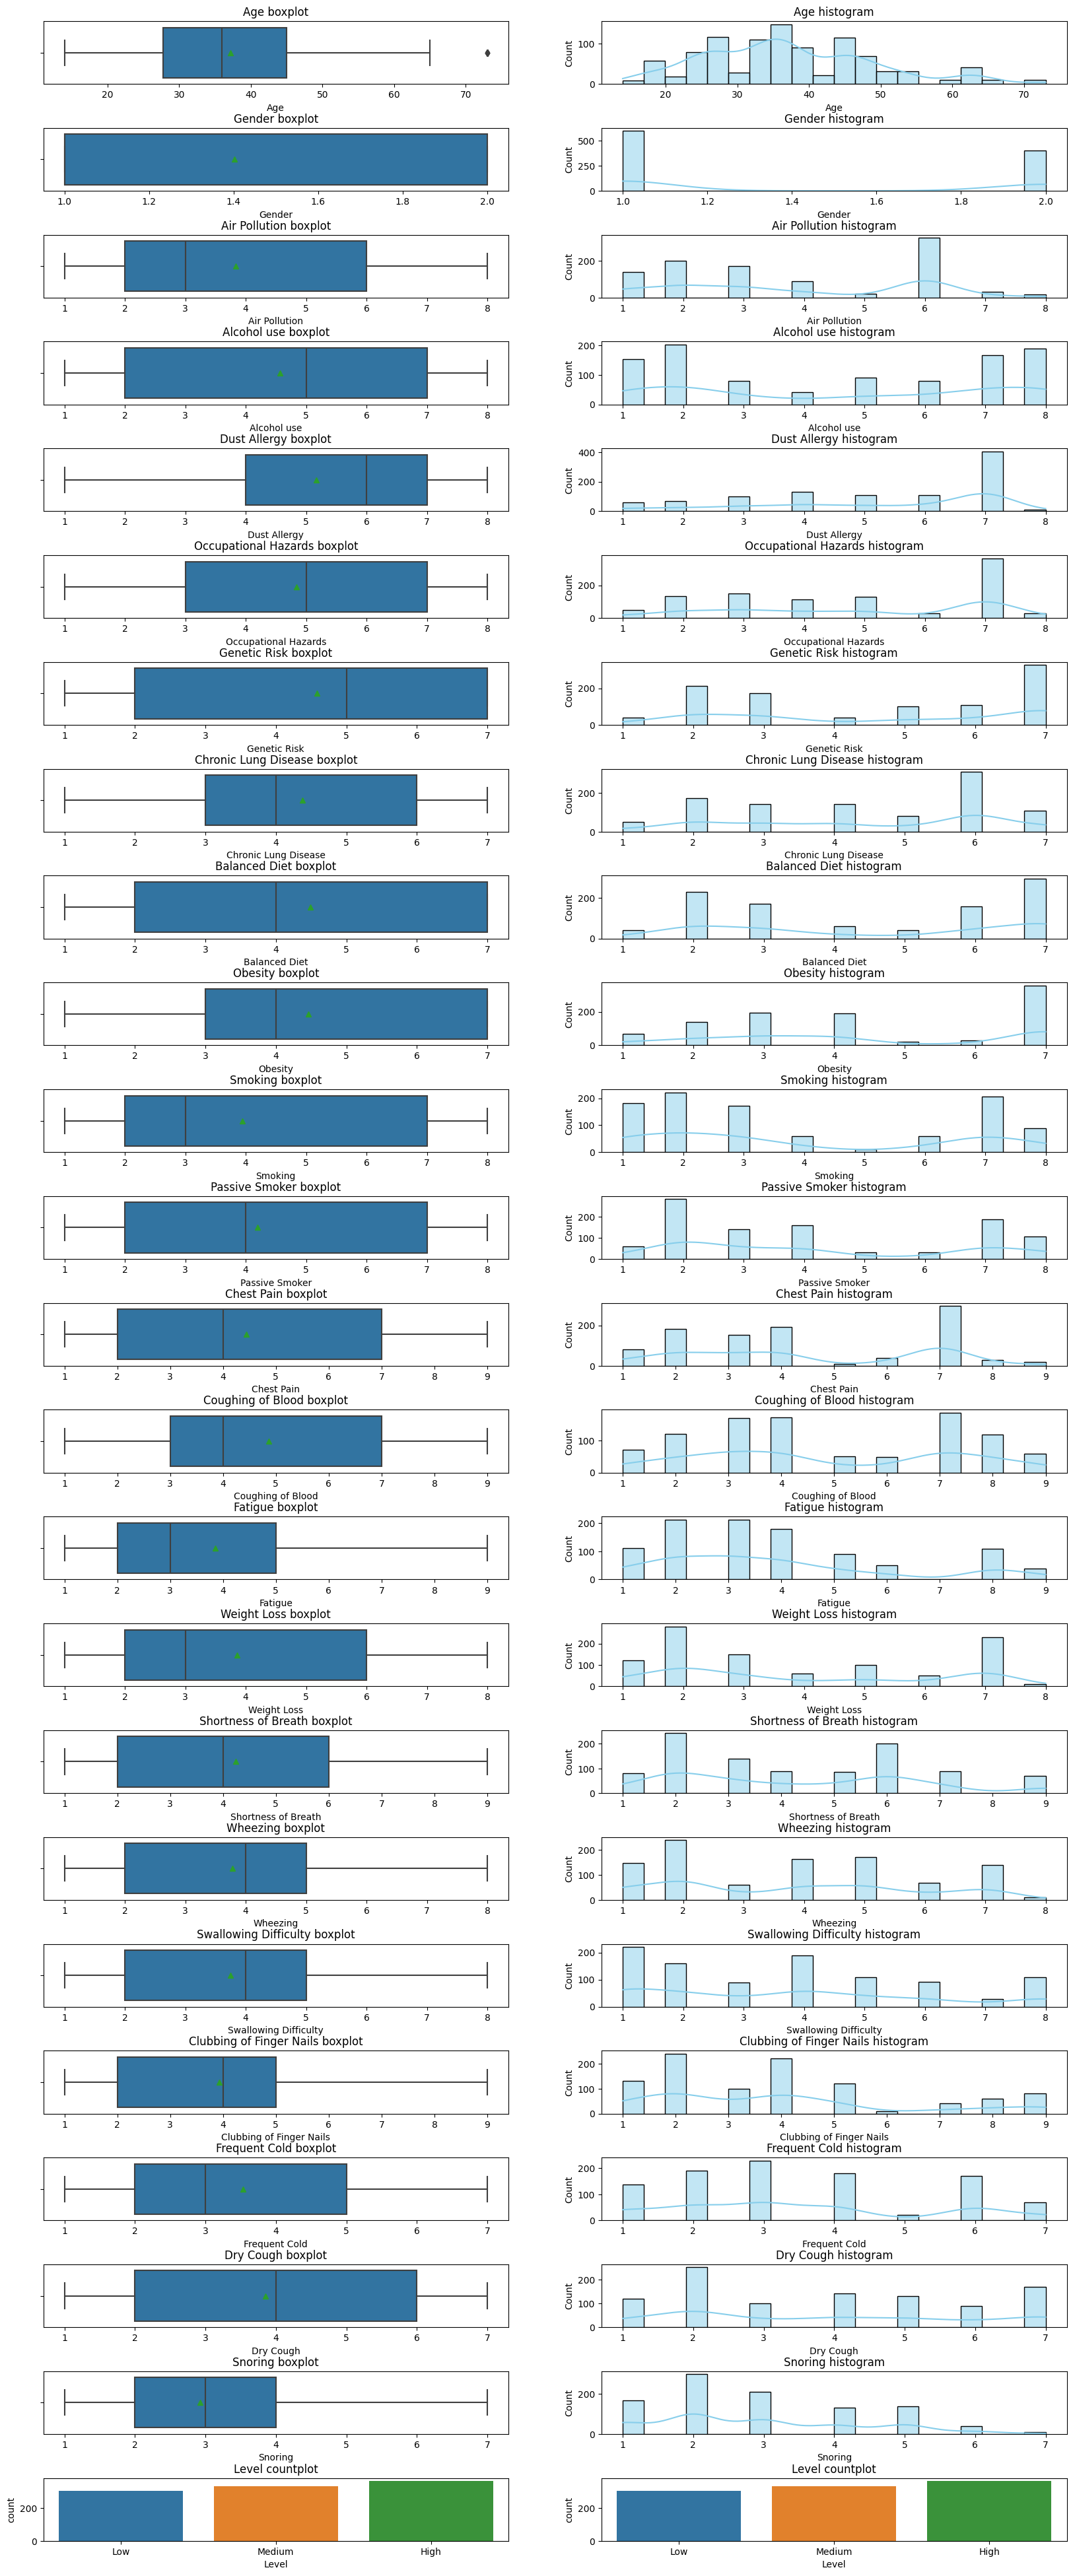

In [23]:
from utils import plot_attribute_distributions
plot_attribute_distributions(df) # FIXME --> sistemare le dimensioni e il plot del target

# Preprocessing
We want to discretize all attributes and put them in scale.

## Age
In order to discretize this attribute we need to divide it in bins, in order to be more accurate we are not going to do it by hand but we'll find the best clusters and then use them as bins.

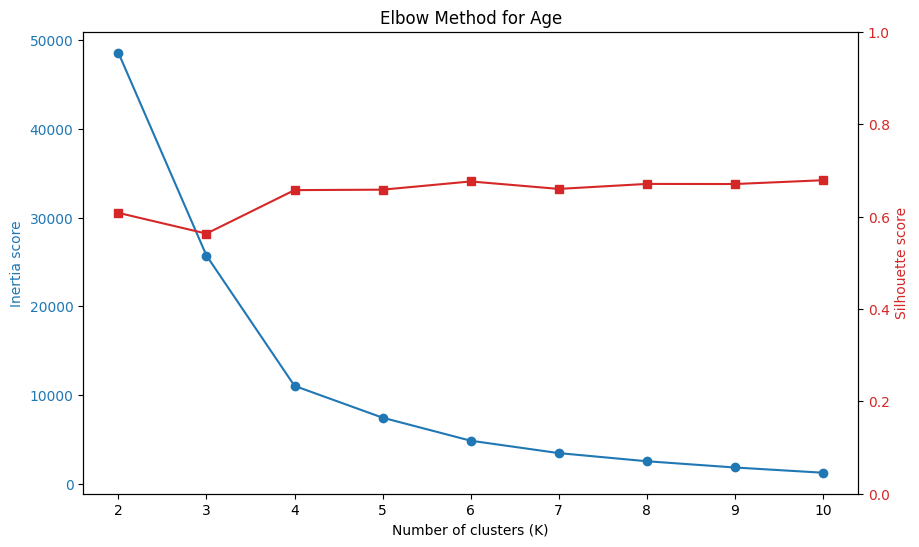

In [24]:
from utils import find_clusters, plot_distribution_cluster

# Elbow method to choose the best clustering schema
find_clusters(df, 'Age')

We can clearly see that the elbow in the inerti is in K=4 and in that point is high enough (> 0.6), so we'll coose 4 clusters.

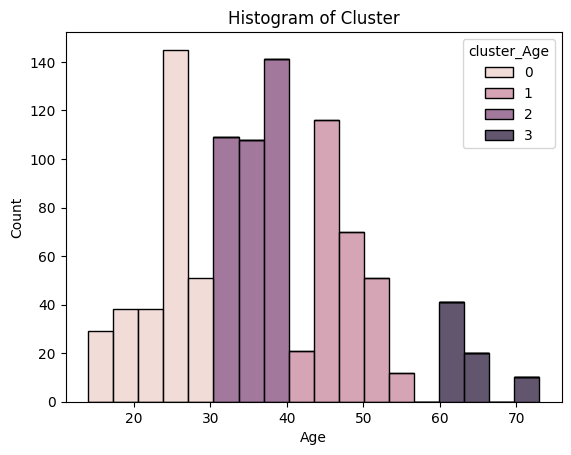

In [25]:
# We make 4 goups
clusters = plot_distribution_cluster(df, 'Age', 4)

In [26]:
df['Age'] = clusters

## Encoding attributes
Now we have to encode the categorical `Low`, `Medium`, `High` as integers and rescale all the other attributes

In [27]:
# Encoding of Level
df['Level'] = df['Level'].map({'High': 2, 'Low': 0, 'Medium': 1})

In [28]:
from sklearn.calibration import LabelEncoder
# Encode attributes

le = LabelEncoder()
for c in df.columns[:-1] :
    df[c] = le.fit_transform(df[c])

In [29]:
# TODO : scrivere il dizionario di encoding, utile più avanti

## Feature selection
We have too many attributes so we need to prune some of them in order to obtain a dataset that can be the most representative possible.

So first we'll start by using the Domain Knowledge for causes and consequences:
1) Following [American Lung Association](https://www.lung.org/lung-health-diseases/lung-disease-lookup/lung-cancer/basics/what-causes-lung-cancer#:~:text=Smoking%20is%20the%20number%20one,do%20for%20your%20lung%20health.), the most influent factors are:
    - `Smoking` and `Passive Smoker`
    - `Occupational Hazards`
    - `Air Pollution`
    - `Genetic Risk`
2) Following [Cancer Research UK](https://www.cancerresearchuk.org/about-cancer/lung-cancer/risks-causes), one other important factor is:
    - `Chronic Lung Disease`
3) For what concerns the synthoms of lung cancer, following [Division of Cancer Prevention and Control](https://www.cdc.gov/cancer/lung/basic_info/symptoms.htm) highlights:
    - `Chest Pain`
    - `Shortness of Breath`
    - `Wheezing`
    - `Coughing of Blood`
    - `Fatigue`
    - `Weight Loss`

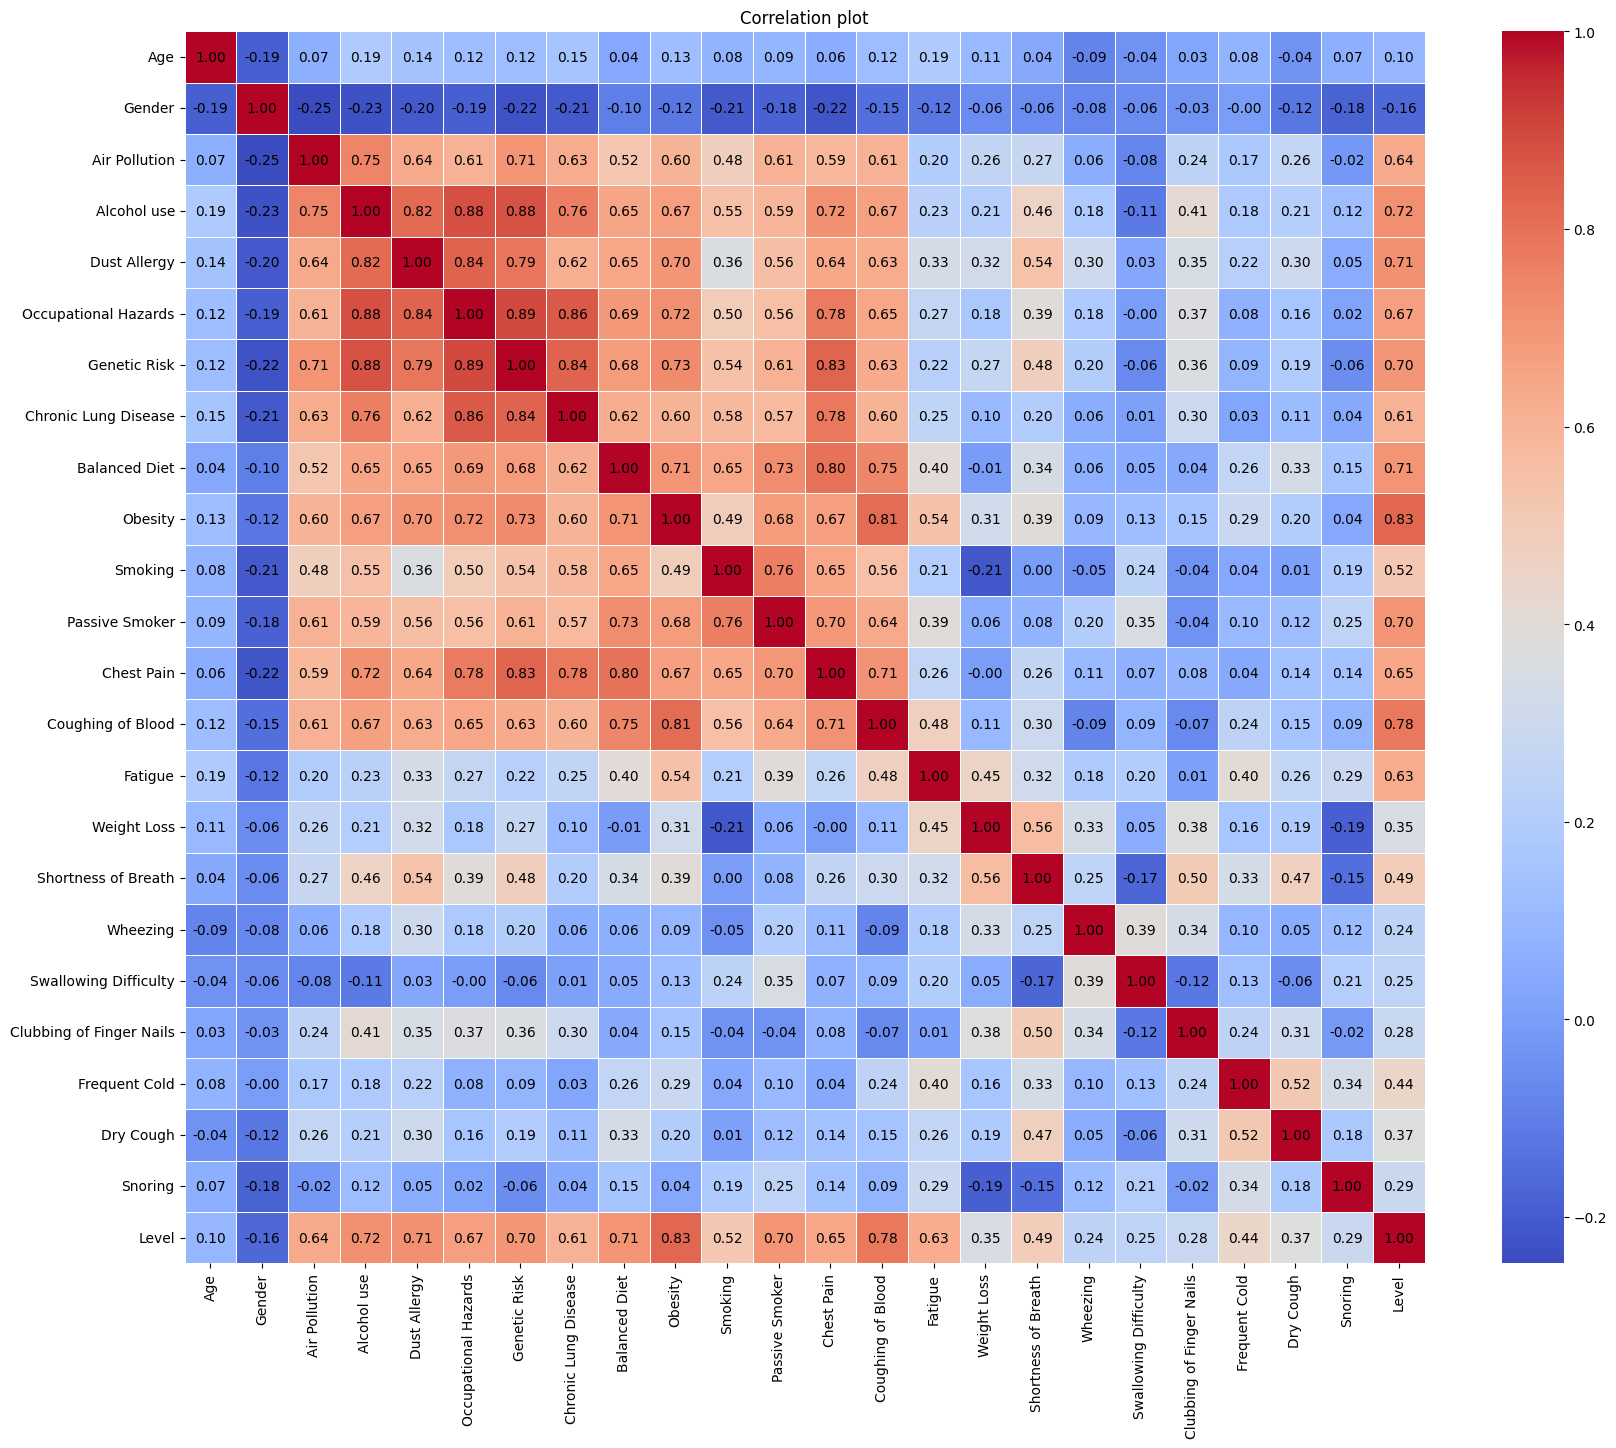

In [30]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# FIXME : capire perchè il modo più immediato non funziona
# plt.figure(figsize=(20,20))
# plt.title('Correlation plot')
# sns.heatmap(df.corr(), 
#             annot=True, 
#             # cmap=sns.diverging_palette(230, 20, as_cmap=True),   
#             square = True,                                 
#             linewidths = 1.5,
#             cbar_kws = {"shrink": .8})

plt.figure(figsize=(20,16))
plt.title('Correlation plot')

sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)

# Sovrapporre i numeri della matrice di correlazione
for i in range(len(df.corr())):
    for j in range(len(df.corr().columns)):
        plt.text(j+0.5, i+0.5, "{:.2f}".format(df.corr().iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=10)

plt.xticks(np.arange(len(df.corr().columns)) + 0.5, df.corr().columns)
plt.yticks(np.arange(len(df.corr().index)) + 0.5, df.corr().index)
plt.show()


We can notice a block of high correlation between `Air Pollution`, `Alcohol use`, `Dust Allergy`, `Occupational Hazards`, `Genetic Risk`, `Chronic Lung Disease`, `Balanced Diet`, `Obesity`, `Smoking`, `Passive Smoker`, `Chest Pain`, `Coughing of Blood` and the target `Level`.

While there were no very low negative correlation values but they are quite next to 0.

Even tho there seems to be a scorrelation between `Gender`, `Age` and other attributes, we know that those 2 attributes are very important, as we can easily show by a quick query:

In [31]:
distribution = df.groupby(['Age', 'Gender', 'Level']).size().unstack(level=-1, fill_value=0)
display(distribution.div(distribution.sum(axis=1), axis=0) * 100)

Level               0          1          2
Age Gender                                 
0   0       21.739130  42.028986  36.231884
    1       60.122699   6.748466  33.128834
1   0       28.176796  23.204420  48.618785
    1       28.089888  59.550562  12.359551
2   0       23.696682  31.753555  44.549763
    1       19.727891  48.299320  31.972789
3   0       26.470588  44.117647  29.411765
    1       66.666667   0.000000  33.333333

So in the end we'll select only: 
- `Smoking` and `Passive Smoker`
- `Occupational Hazards`
- `Air Pollution`
- `Genetic Risk`
- `Chronic Lung Disease`
- `Chest Pain`
- `Shortness of Breath`
- `Wheezing`
- `Coughing of Blood`
- `Fatigue`
- `Weight Loss`
- `Age`
- `Gender`
- `Level`

In [32]:
selected_attributes = [
    'Age', 'Gender', 'Smoking', 'Passive Smoker', 'Occupational Hazards', 'Air Pollution', 
    'Genetic Risk', 'Chronic Lung Disease', 'Chest Pain', 'Shortness of Breath', 
    'Wheezing', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Level'
]

# Filtering the DataFrame to keep only the selected attributes
dataset = df[selected_attributes]
dataset

Age  Gender  Smoking  Passive Smoker  Occupational Hazards  \
0      2       0        2               1                     3   
1      0       0        1               3                     2   
2      2       0        1               2                     4   
3      2       0        6               6                     6   
4      1       0        7               6                     6   
..   ...     ...      ...             ...                   ...   
995    1       0        6               7                     6   
996    2       1        6               7                     6   
997    0       1        1               2                     4   
998    0       1        7               6                     6   
999    1       0        1               2                     4   

     Air Pollution  Genetic Risk  Chronic Lung Disease  Chest Pain  \
0                1             2                     1           1   
1                2             3                     1           1   
2                3             4                     3           3   
3                6             5                     6           6   
4                5             6                     5           6   
..             ...           ...                   ...         ...   
995              5             6                     5           6   
996              5             6                     5           6   
997              3             4                     3           3   
998              5             6                     5           6   
999              5             4                     3           3   

     Shortness of Breath  Wheezing  Coughing of Blood  Fatigue  Weight Loss  \
0                      1         1                  3        2            3   
1                      6         7                  2        0            2   
2                      7         1                  7        6            6   
3                      2         0                  7        3            1   
4                      3         0                  8        2            1   
..                   ...       ...                ...      ...          ...   
995                    1         6                  6        4            2   
996                    4         6                  6        7            5   
997                    7         1                  7        6            6   
998                    3         0                  8        2            1   
999                    7         1                  7        6            6   

     Level  
0        0  
1        1  
2        2  
3        2  
4        2  
..     ...  
995      2  
996      2  
997      2  
998      2  
999      2  

[1000 rows x 15 columns]

In [33]:
# The single values or range of the final attributes
dataset.apply(lambda x: sorted(x.unique())) # TODO : chech the values after having written the dictionary

Age                                    [0, 1, 2, 3]
Gender                                       [0, 1]
Smoking                    [0, 1, 2, 3, 4, 5, 6, 7]
Passive Smoker             [0, 1, 2, 3, 4, 5, 6, 7]
Occupational Hazards       [0, 1, 2, 3, 4, 5, 6, 7]
Air Pollution              [0, 1, 2, 3, 4, 5, 6, 7]
Genetic Risk                  [0, 1, 2, 3, 4, 5, 6]
Chronic Lung Disease          [0, 1, 2, 3, 4, 5, 6]
Chest Pain              [0, 1, 2, 3, 4, 5, 6, 7, 8]
Shortness of Breath        [0, 1, 2, 3, 4, 5, 6, 7]
Wheezing                   [0, 1, 2, 3, 4, 5, 6, 7]
Coughing of Blood       [0, 1, 2, 3, 4, 5, 6, 7, 8]
Fatigue                    [0, 1, 2, 3, 4, 5, 6, 7]
Weight Loss                [0, 1, 2, 3, 4, 5, 6, 7]
Level                                     [0, 1, 2]
dtype: object

# Bayesian Network

## Custom Structure

As we have seen in preprocessing, we can divide the attributes in causes and consequences of lung cancer.

In [34]:
# TODO : write better the comments, since now they seem auto-generated
custom_structure = [
    # Causes ############################################################################
    # Demographic Factors
    ('Age', 'Level'),                   # Age may influence cancer level
    ('Gender', 'Level'),                # Gender may influence cancer level
    
    # Lifestyle and Environmental Factors
    ('Smoking', 'Level'),               # Smoking behavior can affect cancer level
    ('Passive Smoker', 'Level'),        # Passive smoking can affect cancer level
    ('Occupational Hazards', 'Level'),  # Occupational hazards can affect cancer level
    ('Air Pollution', 'Level'),         # Air pollution can affect cancer level
    
    #  Factors
    ('Genetic Risk', 'Level'),          # Genetic risk can affect cancer level
    ('Chronic Lung Disease', 'Level'),  # ...

    # Consequences ######################################################################
    ('Level', 'Chest Pain'),            # Cancer level can influence chest pain
    ('Level', 'Shortness of Breath'),   # Cancer level can influence shortness of breath
    ('Level', 'Wheezing'),              # Cancer level can influence wheezing
    ('Level', 'Coughing of Blood'),     # Cancer level can influence coughing of blood
    ('Level', 'Fatigue'),               # Cancer level can influence fatigue
    ('Level', 'Weight Loss')            # Cancer level can influence weight loss
]


## Structure Learning
Structure learning in Bayesian networks refers to the process of inferring the underlying graphical structure of the network from data. In other words, it involves determining which variables are connected to each other and the direction of these connections based on observed data. Those methods are used instead of defining a custom structure.

The methods i'll show are:

1) **Tree model**: \
It is specific structure within the Bayesian network where the nodes are arranged in a hierarchical tree-like fashion.
Tree models are particularly useful in scenarios where the relationships between variables exhibit a clear hierarchical structure or when efficient inference algorithms are required. It can be generated by:

    - <u>Chow-liu alhorithm</u> \
    It constructs an optimal tree structure by maximizing the mutual information between variables. The algorithm begins by calculating the mutual information between all pairs of variables and then constructs a minimum spanning tree based on these mutual information values. Finally, it selects a root node and orients the edges of the tree to form a directed acyclic graph (DAG).
    

    - <u>Tree Augmented Naive Bayes (TAN) algorithm</u> \
    The structure is learned by selecting a root node (typically the class label) and then adding edges between feature nodes based on conditional mutual information with the class label and other features.

2) **HillClimb**:\
The algorithm starts with an initial network structure (empty of predefined) and makes local modifications to it in order to improve its score. More specifically the moidfication's aim is reaching a local optimum in terms of model fit to the data. At each step, the algorithm considers all possible modifications to the current network structure and selects the modification that leads to the greatest improvement in the scoring metric. This process is repeated until no further improvement can be made, at which point the algorithm terminates and returns the learned network structure. The scores are:
    - <u>K2</u> \
    It considers the maximum likelihood estimates of the parameters (conditional probabilities) in the model. It aims to search for the structure of the Bayesian network that maximizes the likelihood of the data while penalizing model complexity to avoid overfitting.
    

    - <u>BDeu (Bayesian Dirichlet equivalent uniform)</u> \
    It computes the posterior probability of a network structure given the observed data. It incorporates a Dirichlet prior to handle cases where there is sparse data. The Dirichlet prior is used to introduce prior beliefs about the parameters of the Bayesian network.
    

    - <u>BDS (Bayesian Dirichlet Score)</u> \
    It is similar to the BDeu score but the parameter of the Dirichlet prior is determined based on a prior sample size or pseudocounts. These pseudocounts are added to each cell of the contingency table, effectively incorporating prior belief in the form of pseudo-observations.
    

    - <u>BIC (Bayesian Information Criterion)</u> \
    It balances model fit with model complexity by penalizing the number of parameters in the model

        $BIC = -2 * \text{log-likelihood} + d * log(N)$
        
        Where:
        - $d$ is the number of free parameters in the model.
        - $N$ is the sample size.
    
    - <u>AIC (Akaike Information Criterion)</u> \
    It is similar to BIC score but it is less severe with respect to model complexity

        $ AIC = -2 * \text{log-likelihood} + 2K $

        Where:
        - $K$ is the number of parameters in the model.

3) **Naive Bayes** \
<u>It is not really a structure learning technique</u>, since it assumes a particular structure where all features are conditionally independent given the class variable. However, it is widely used due to its simplicity and efficiency in classification tasks.

4) **PC (Constraint-Based Estimator)** \
It identifies (conditional) dependencies in data set using statistical independence tests and estimates a DAG pattern that satisfies the identified dependencies. 
It is based on the principle of conditional independence testing, where it systematically evaluates independence relationships among variables to infer the network structure. 
It follows 3 steps:

    - <u>Build Skeleton</u> \
    The algorithm starts by building an undirected graph representing the skeleton of the Bayesian Network. This initial graph represents potential dependencies among variables but does not incorporate directionality or causal relationships.
    
    - <u>Orient Edges</u> \
    Next, the algorithm attempts to orient the edges in the graph based on conditional independence tests. It iteratively considers all pairs of variables and tests if there exists an unshielded triple (a->b<-c) where a and c are not adjacent, and b is not in the Markov blanket of a or c. If such a triple exists, the algorithm orients the edge between a and c.

    - <u>Remove Spurious Edges</u> \
    Lastly, the algorithm removes spurious edges that may have been introduced during the edge orientation process. This step ensures that the final network structure reflects only the true dependencies among variables.

5) **Exhaustive Search** \
Search class for exhaustive searches over all DAGs with a given set of variables. It choses the on with the maximal score (an instance of the score we have already seen in HillClimb). In `pgmpy`, using more than 6 nodes is unfiseable due to the number of possible DAGs that can be generated with $n$ nodes: $n!$ .

6) **MMHC (Max-Min Hill Climbing)** \
It combines the strengths of both constraint-based and score-based approaches. It starts with an initial network structure obtained from the PC algorithm and then refines it using a hill-climbing search guided by a scoring metric. Then it employs a local search strategy that explores the space of possible network structures in a systematic and efficient manner. In order to choose the best schema, it uses an instance of the scores we have already seen in HillClimb.


In [35]:
import BayesianNetworkComparator as bnc
comparator = bnc.BayesianNetworkComparator(dataset)

In [36]:
# Since it is an onerous and slow operation (> 5000 mins) , we'll save a backup of the comparator and use it the next times instead of running all the code
import os
import pickle
percorso_file_1 = './backups/comparator_with_structures.pkl'

if os.path.exists(percorso_file_1): # we use the latest backup
    with open(percorso_file_1, 'rb') as f:
        comparator = pickle.load(f)

else : # compute and register the backup
    comparator.generate_structures(custom=custom_structure, target_label='Level')
    with open(percorso_file_1, 'wb') as f:
        pickle.dump(comparator, f)

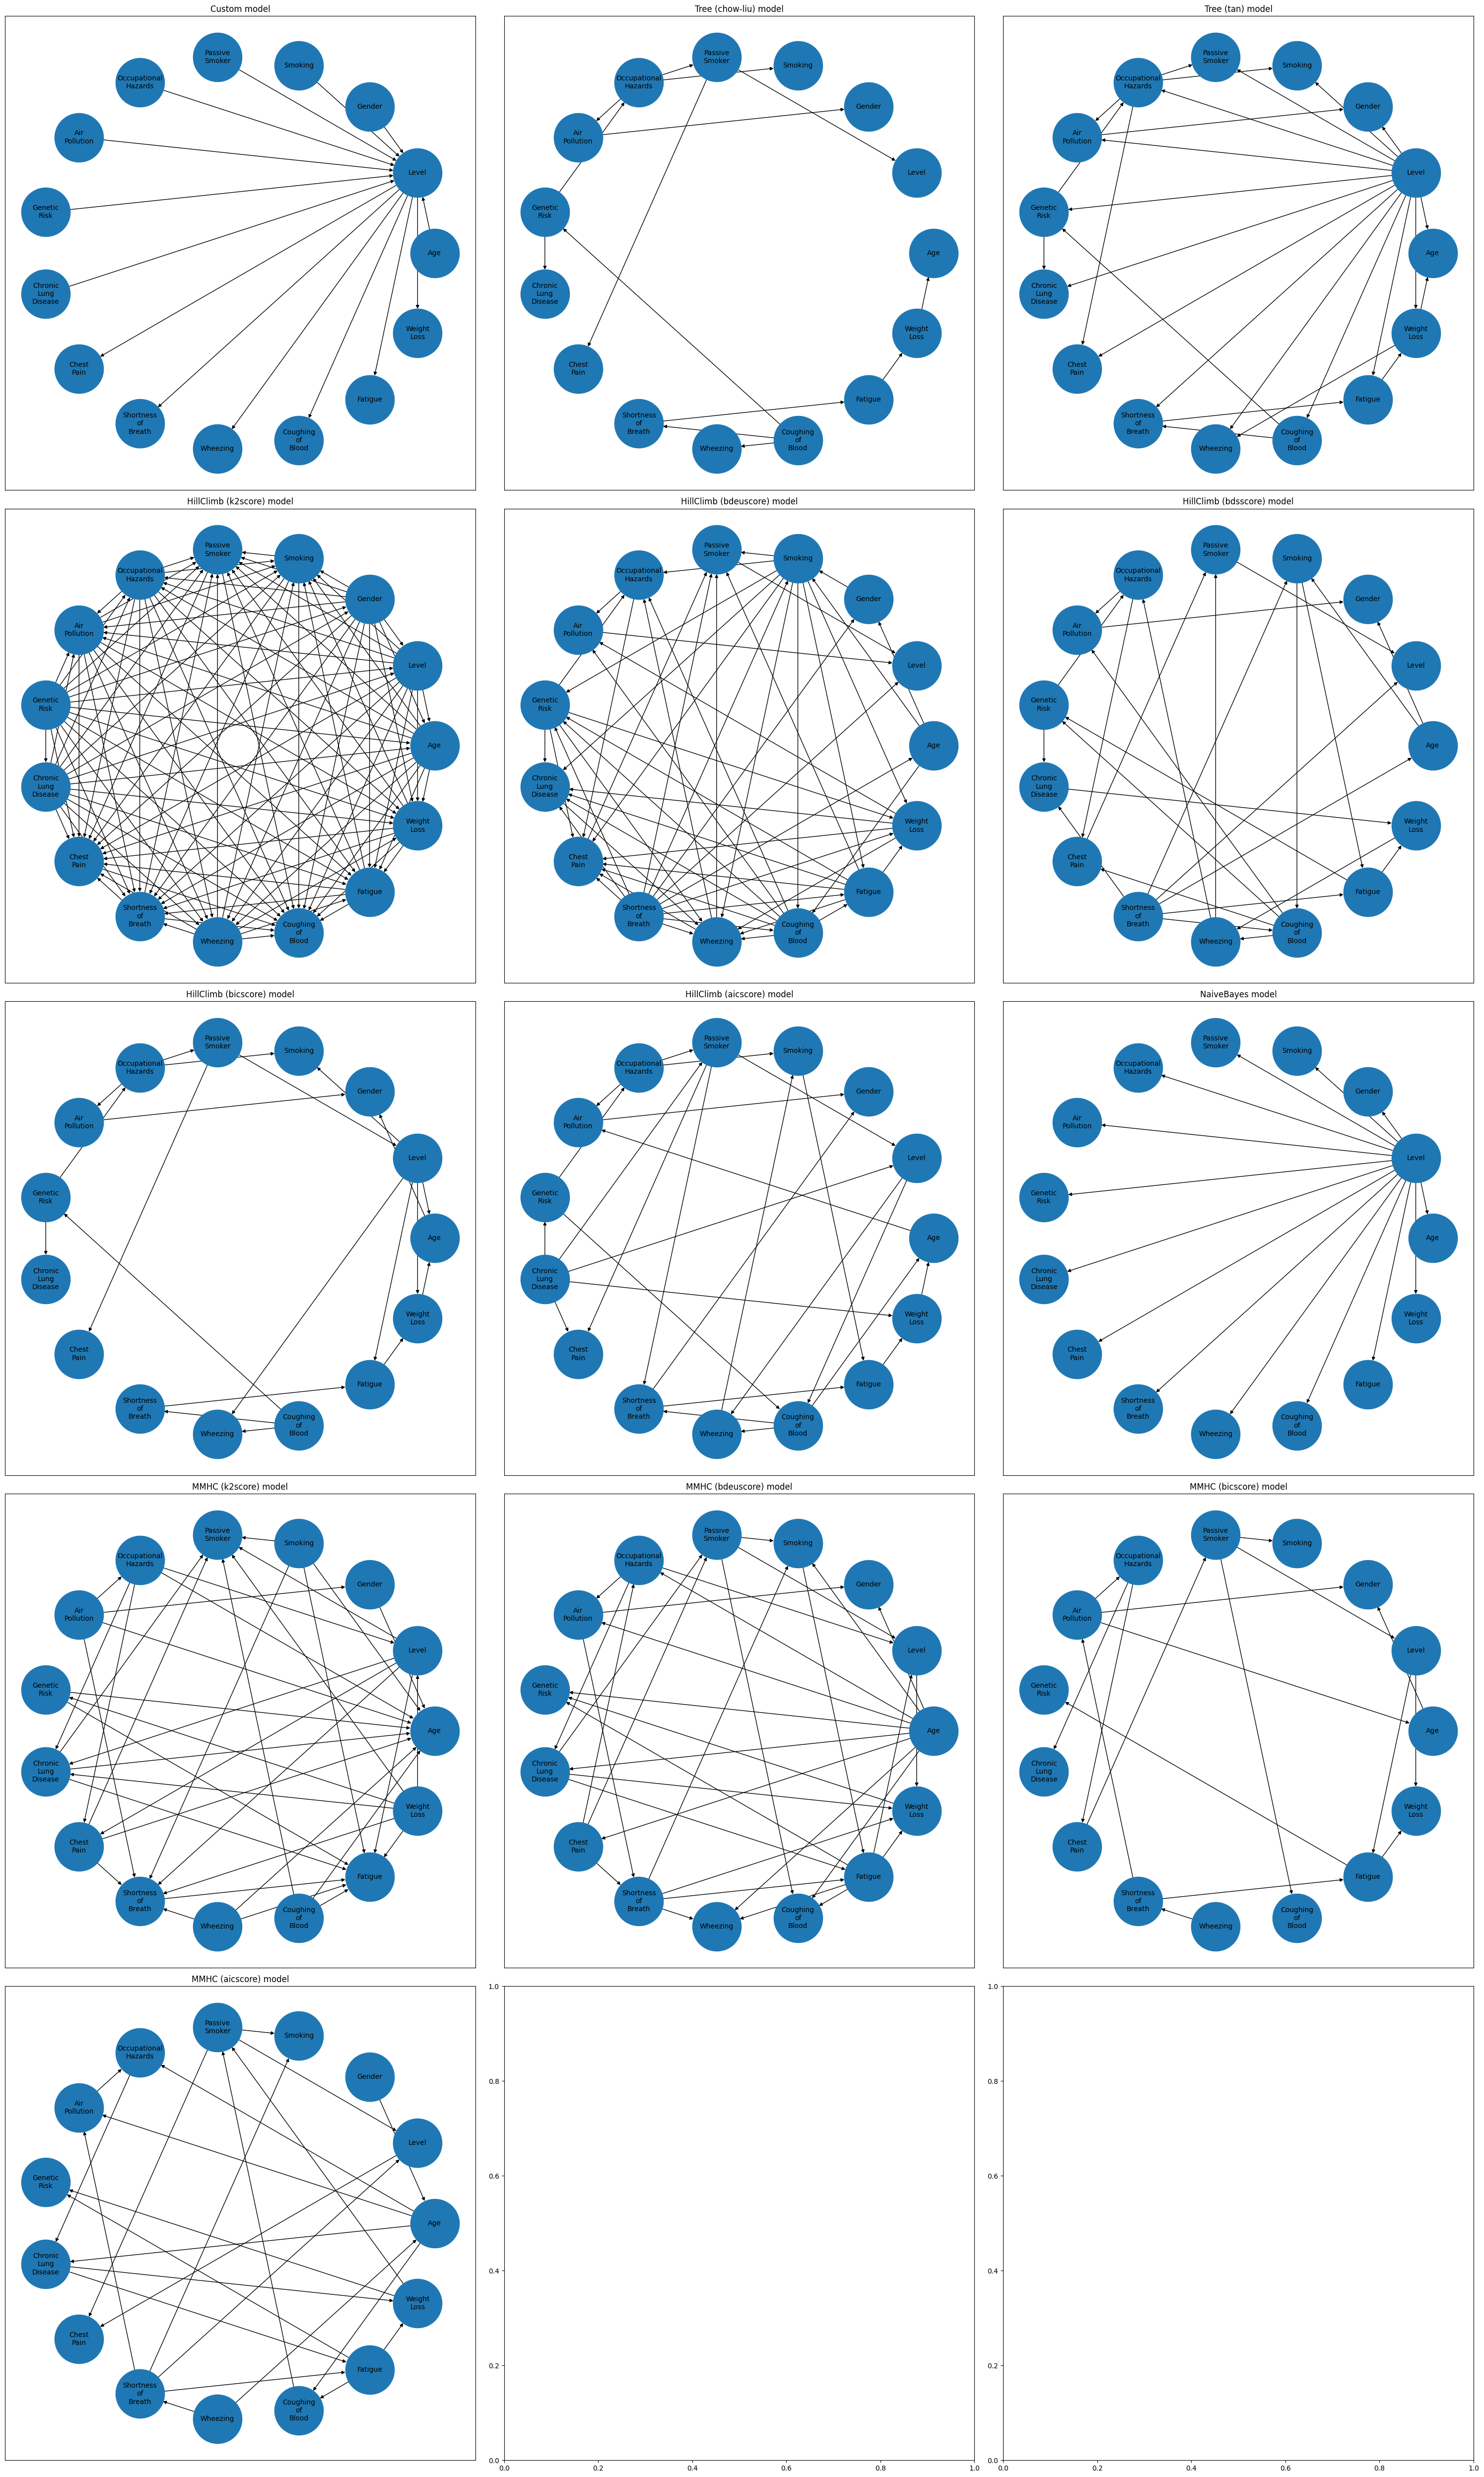

In [37]:
comparator.display_structures()

TODO : write the differences between the structures

## Parameter Estimation
It is the process of determining the probabilities associated with the nodes and edges of the network based on observed data.

There are some techniques to obtain extract the proabbilities from the data:
1) **Maximum Likelihood Estimation (MLE)** \
This approach estimates the parameters of conditional probability tables (CPTs) based solely on the observed frequencies of variable configurations in the dataset.
Moreover it computes these probabilities by counting the occurrences of each variable configuration in the dataset and normalizing these counts to obtain probabilities. This technique is straightforward and computationally efficient, making it a common choice for parameter estimation, especially when dealing with large datasets.

2) **Bayesian Estimator** \
This estimator treats parameters as random variables and estimates their posterior distribution given the data and prior knowledge. This approach allows users to specify prior distributions for the parameters, which can be particularly useful when dealing with limited data or when there is domain expertise available

3) **Expectation Maximization** \
It is an iterative algorithm that alternates between two steps: the Expectation (E) step and the Maximization (M) step. In the E step, it computes the expected values of the latent variables given the observed data and the current parameter estimates. In the M step, it updates the parameter estimates to maximize the likelihood of observing the data, taking into account the expected values computed in the E step.


In [38]:
evaluated_models = comparator.evaluate_parameters()

Training Custom: ----------------------------------------------------------------------------------------------------
	for MaximumLikelihoodEstimator ... finished
	for ExpectationMaximization ... 

  0%|          | 0/100 [00:00<?, ?it/s]

finished
Training Tree (chow-liu): ----------------------------------------------------------------------------------------------------
	for MaximumLikelihoodEstimator ... finished
	for ExpectationMaximization ... 

  0%|          | 0/100 [00:00<?, ?it/s]

finished
Training Tree (tan): ----------------------------------------------------------------------------------------------------
	for MaximumLikelihoodEstimator ... finished
	for ExpectationMaximization ... 

  0%|          | 0/100 [00:00<?, ?it/s]

finished
Training HillClimb (k2score): ----------------------------------------------------------------------------------------------------
	for MaximumLikelihoodEstimator ... 